In [1]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix

from mnist_ten.data import test_loader
from mnist_ten.models import classifier, weights_path

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
classifier.load_state_dict(torch.load(weights_path))
classifier.eval()
classifier

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): SqueezeLayer(
      (short): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (long): Sequential(
        (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
        (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): LeakyReLU(negative_slope=0.01)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (3): SqueezeLayer(
      (short): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (long): Sequential(
        (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
        (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): LeakyReLU(negative_slope=0.01)
        (4): MaxPool2d(kernel_size=2, str

In [3]:
real_labels = []
predicted_labels = []

for images, labels in tqdm(test_loader):
    real_labels += list(labels)
    predictions = classifier(images).detach().numpy()
    predicted_labels += np.argmax(predictions, axis=1).tolist()

real_labels = np.array(real_labels)
predicted_labels = np.array(predicted_labels)

In [4]:
print(f'Accuracy: {np.mean(predicted_labels == real_labels)}')

Accuracy: 0.5263


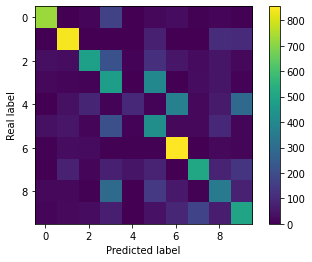

In [5]:
confusion = confusion_matrix(real_labels, predicted_labels)
plt.xlabel('Predicted label')
plt.ylabel('Real label')
plt.imshow(confusion)
plt.colorbar()
plt.show()